In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

In [2]:
# Initialize Otter
#import otter
#grader = otter.Notebook("cs1090a_hw5_siri_premerged.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [3]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "background: orange; border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [30]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score



#additional libraries
import math
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning  



# pip install imblearn

# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [5]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

#### Data Exploration

We started by exploring the dataset by checking its shape and data types. We found that there is no missing data in this dataset. The data consists of two types: integers and floats. For our initial analysis, we considered integers as discrete quantitative variables and floats as continuous quantitative variables. Using these groups, we created visualizations for exploratory data analysis (EDA).

However, we observed a data imbalance in the target variable. To address this, we applied SMOTE to balance the classes.

From the data dictionary and the EDA plots, we identified several features that needed to be removed. For example, the "Educational special needs" column was removed because 99% of the values were '0' (no), making it highly imbalanced and not very useful. Other features with similar issues that we decided to drop include 'Application order,' 'Previous qualification,' 'Nationality,' 'Educational special needs,' and 'International.'

Some features had too many categories, which could complicate the analysis and create a high number of new features when applying one-hot encoding. To simplify, we grouped less common categories together. For example, in the "Marital status" column, most values were '1' (single) or '2' (married), so we grouped the remaining categories as "others." A similar approach was used for features like "Father's occupation" and "Mother's occupation."  We dedicated one cell in the code for feature engineering.  

After feature engineering, we applied one-hot encoding to the categorical features. We decided not to scale 'GDP,' 'Inflation rate,' and 'Unemployment rate' because their distributions seemed more categorical than continuous, based on the plots. Instead, we categorized these three columns as discrete quantitative variables and included them in the one-hot encoding step. 

Most continuous variables showed no severe skewness, so we didn’t apply scaling or transformations. However, some variables, like 'Curricular units 1st sem (grade),' had a high concentration of values at zero. Even with skewness, we decided not to use transformations like Box-Cox because it wouldn’t significantly impact these distributions.

The final number of features are 82 after one-hot-encoder.



#### Data approach for each model

The data requirements differ for each model. OVR Logistic Regression requires more extensive preparation, including one-hot encoding categorical features and simplifying or removing features that may cause multicollinearity. In contrast, "decision trees" and "random forests", the models chosen for this homework, are non-parametric and do not require scaling or normalization, as they split data based on thresholds. Random forests, as ensembles of decision trees, share these properties but generally need more data to prevent overfitting. While logistic regression struggles with categorical variables unless one-hot encoded, decision trees and random forests can often handle them directly, depending on the implementation.

- The data used for OVR Logistic Regression comes from the feature engineering process, which includes removing certain features, applying one-hot encoding, and balancing the dataset using SMOTE.

- The data used for Decision Trees and Random Forests is the balanced dataset from SMOTE, with all features retained.

In [31]:
# load data

pd.set_option('display.max_columns', None)
xtrain = pd.read_csv('./data/X_train.csv')
xtest = pd.read_csv('./data/X_test.csv')
ytrain = pd.read_csv('./data/y_train.csv')

print('xtrain.shape:', xtrain.shape)
print('xtest.shape:', xtest.shape)
print('ytrain.shape:', ytrain.shape)

print('\nFirst few rows of xtrain:')
xtrain.head(5)
print('\nFirst few rows of ytrain:')
ytrain.head(5)

xtrain.dtypes


xtrain.shape: (3318, 36)
xtest.shape: (1106, 36)
ytrain.shape: (3318, 1)

First few rows of xtrain:

First few rows of ytrain:


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [32]:
#Data sample
xtrain.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [33]:
#Data sample

ytrain.head()


,Target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout


In [34]:
#merge data to create plot
train = pd.concat([xtrain, ytrain], axis=1)

train.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,12.4,0.5,1.79,Graduate
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,11.1,0.6,2.02,Graduate
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79,Dropout
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,10.8,1.4,1.74,Dropout


In [39]:
#Create the EDA based on type of the variable.  Continuous and Discrete

continuous_feature = xtrain.select_dtypes(include=['float64']).columns
discrete_feature = xtrain.select_dtypes(include=['int64']).columns
categorical_feature = xtrain.select_dtypes(include=['object']).columns

print("\nQuantitative Feature:", list(continuous_feature))

print("\nQuantitative Discrete Feature::", list(discrete_feature))

print("\nCategorical Feature::", list(categorical_feature))



Quantitative Feature: ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']

Quantitative Discrete Feature:: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular unit

In [35]:
#Check missing data on both columns and row  - So far no missing data

#Checking xtrain
print(f'Xtrain Columns with at least one NaN value: {xtrain.isna().any(axis=0).sum()}')
print(f'Xtrain Rows with at least one NaN value: {xtrain.isna().any(axis=1).sum()}')

#Checking xtest
print(f'Xtest Columns with at least one NaN value: {xtest.isna().any(axis=0).sum()}')
print(f'Xtest Rows with at least one NaN value: {xtest.isna().any(axis=1).sum()}')

#Checking ytrain 
print(ytrain.describe())
ytrain_series = pd.Series(ytrain,dtype="category")
print(f'Ytrain Rows with at least one NaN value: {ytrain_series.isna().sum()}')

#As a result, no missing data

Xtrain Columns with at least one NaN value: 0
Xtrain Rows with at least one NaN value: 0
Xtest Columns with at least one NaN value: 0
Xtest Rows with at least one NaN value: 0
          Target
count       3318
unique         3
top     Graduate
freq        1657
Ytrain Rows with at least one NaN value: 0


#### EDA Plot

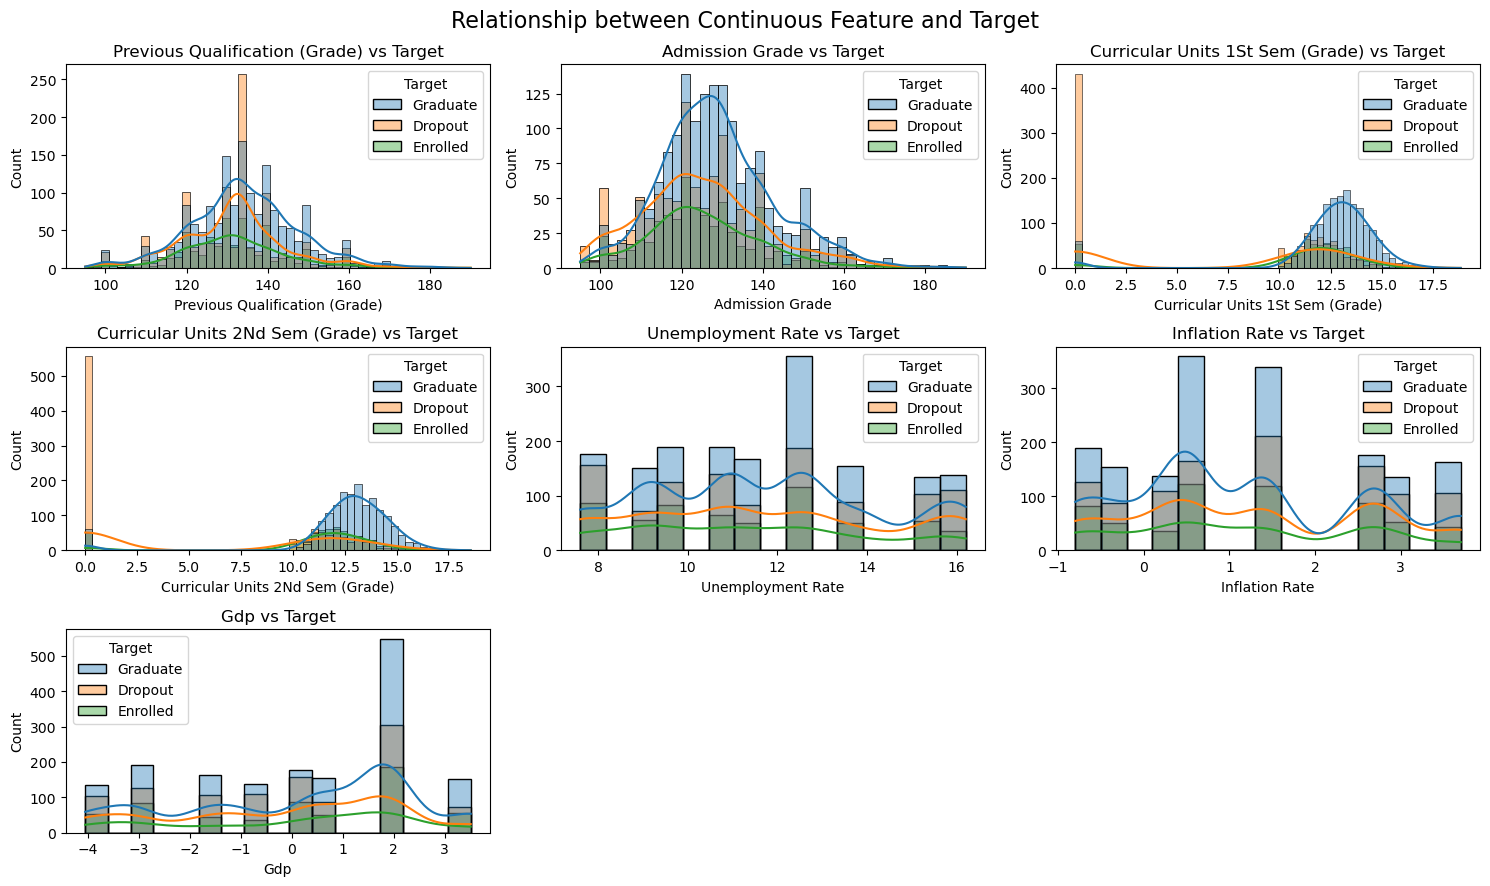

In [37]:
#Quantitative EDA plot (Pre-SMOTE data)

num_plots = len(continuous_feature)
cols = 3  
rows = math.ceil(num_plots / cols)

fig_width = 5 * cols
fig_height = 3 * rows
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(fig_width, fig_height))
fig.suptitle("Relationship between Continuous Feature and Target", fontsize=16)
axes = axes.ravel()


for ax, feature in zip(axes, continuous_feature):
    sns.histplot(data=train, x=feature, hue='Target', ax=ax, kde=True, alpha=0.4)  
    ax.set_title(f'{feature.replace("_", " ").title()} vs Target')
    ax.set_xlabel(feature.replace("_", " ").title())


for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

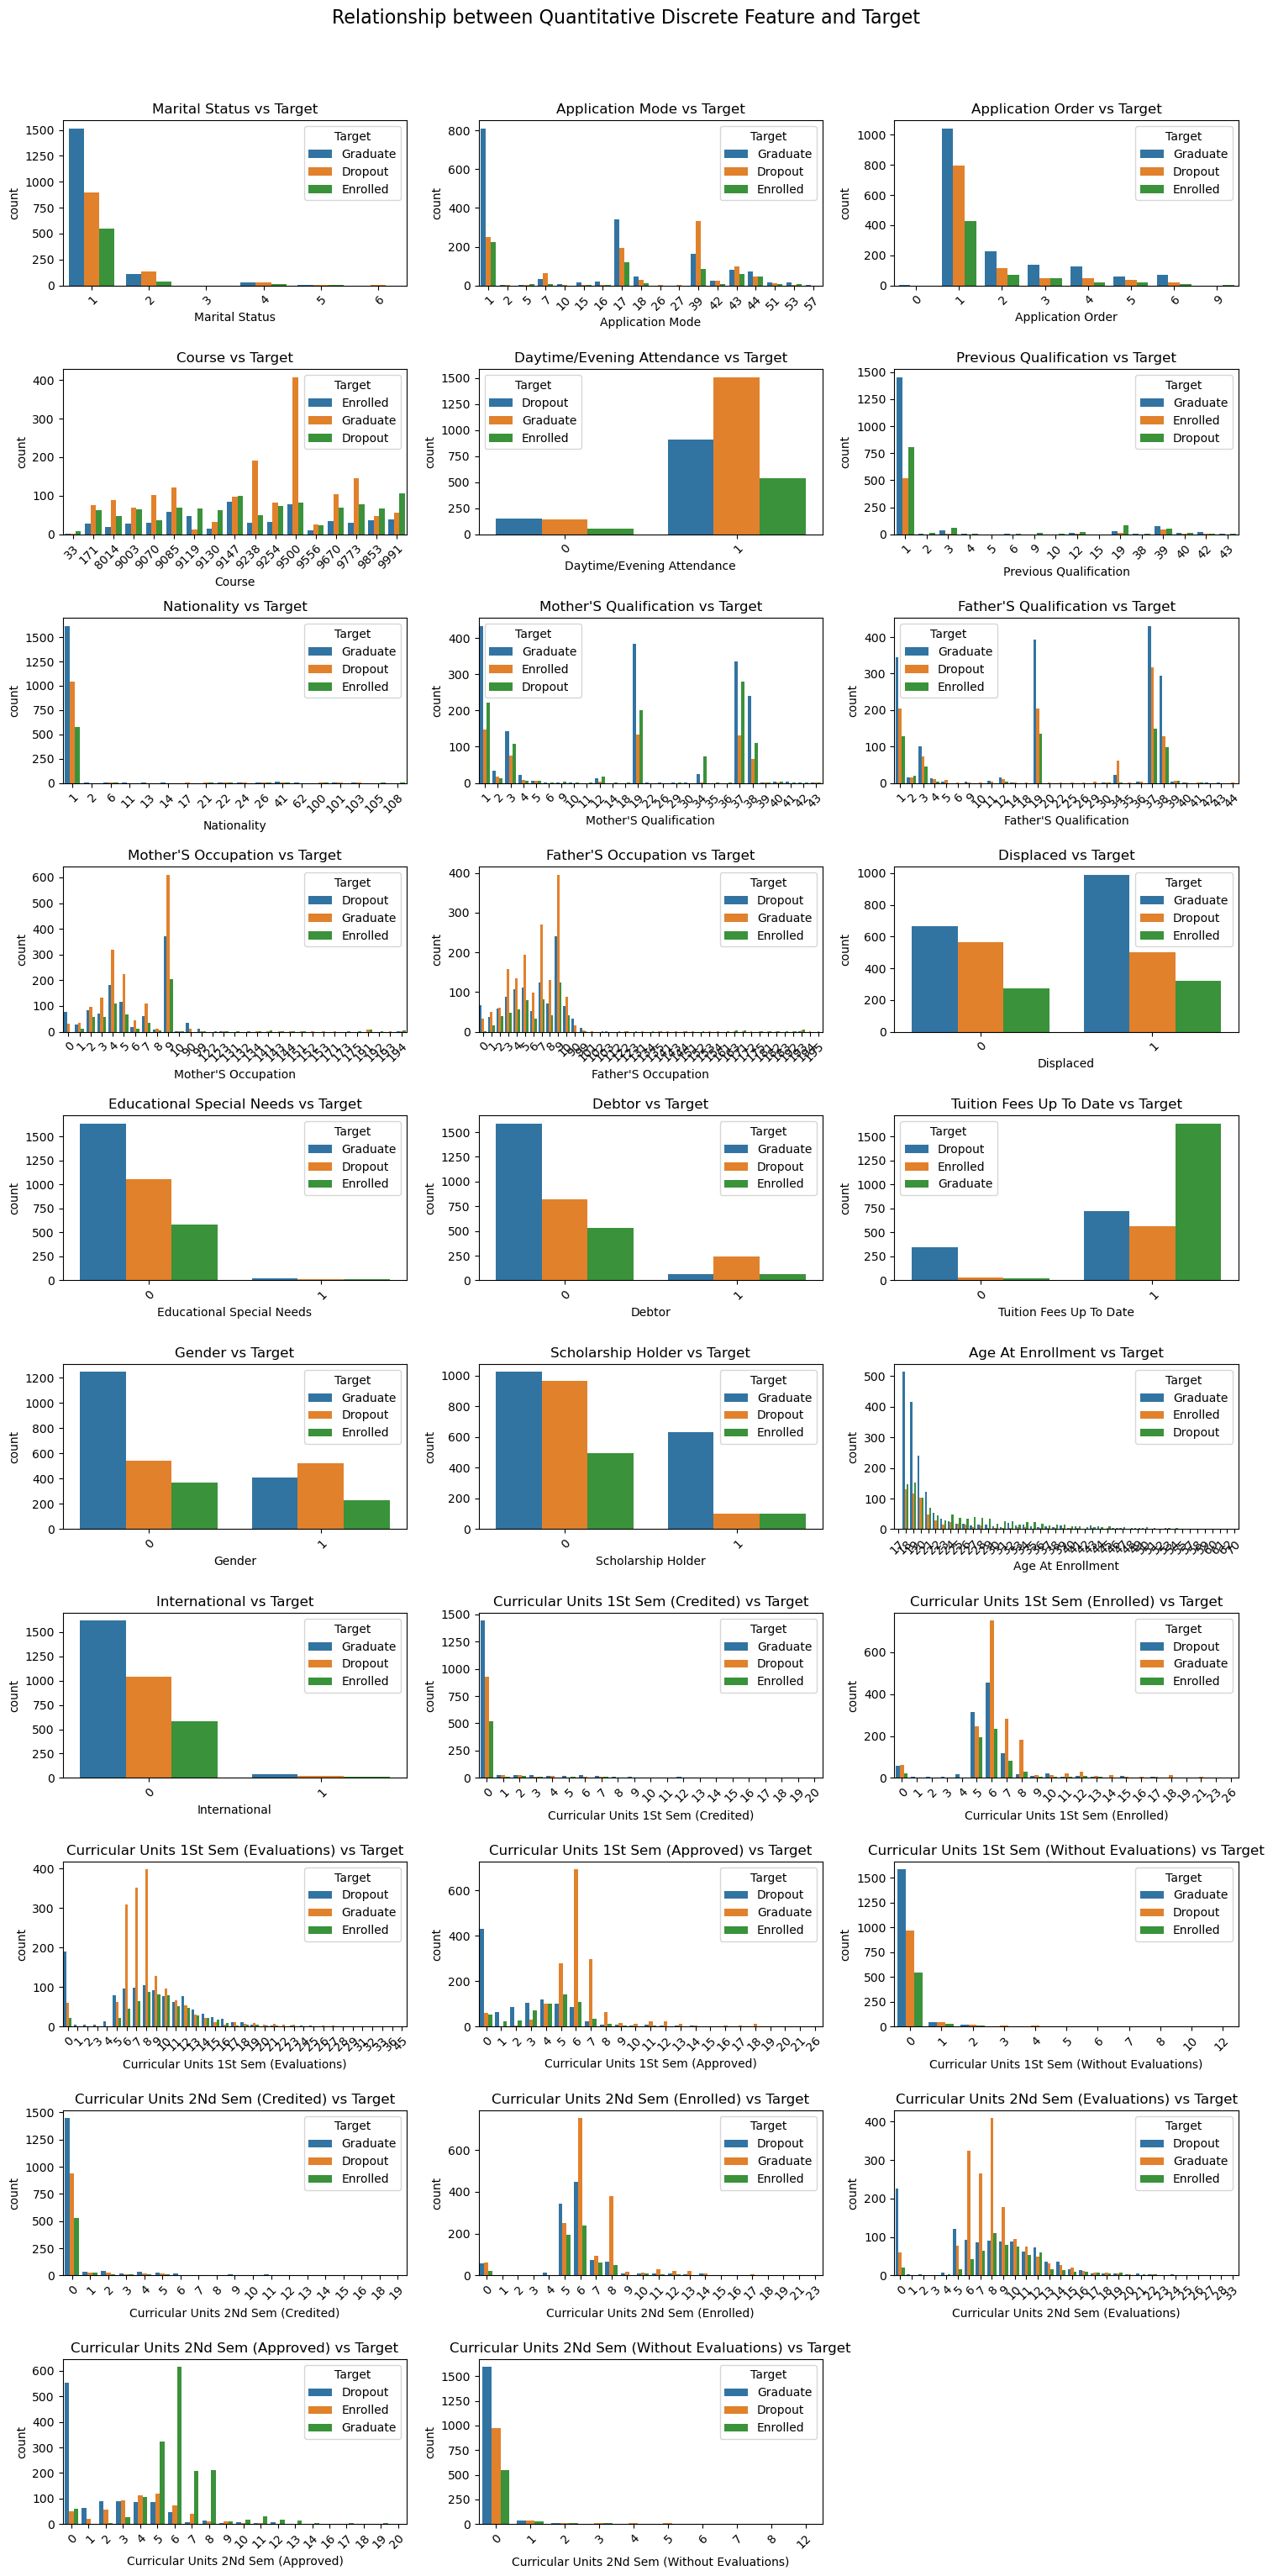

In [38]:
#Quantitative Discrete Feature plot (Pre-SMOTE)

num_plots = len(discrete_feature)
cols = 3  
rows = math.ceil(num_plots / cols)

fig_width = 5 * cols
fig_height = 3 * rows
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(fig_width, fig_height))
fig.suptitle("Relationship between Quantitative Discrete Feature and Target", fontsize=16,y=1.02)
axes = axes.ravel()


for ax, feature in zip(axes, discrete_feature):
    sns.countplot(data=train, x=feature, hue='Target', ax=ax)  
    ax.set_title(f'{feature.replace("_", " ").title()} vs Target')
    ax.set_xlabel(feature.replace("_", " ").title())
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Data Handling - Imbalance data

There are 2 parts of data balancing using SMOTE here
1. xtrain/ytrain -> (apply SMOTE) -> xtrain_resampled_df/ytrain_resampled_df      (This output is for Decision Tree and Randon forest)
2. xtrain - > Feature Engineering -> OnehotEncoding on catgorical -> Balancing using SMOTE   -> xtrain_resampled_df1/ytrain_resampled_df1  (This output is for OVR Logistic Regression)



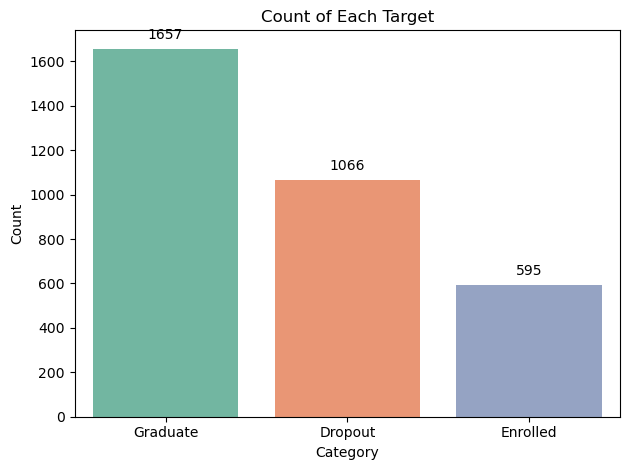

In [40]:
#Check data imbalance - Graduate is much higher than other classes

sns.countplot(data=ytrain,x='Target',hue = 'Target',palette = 'Set2')
plt.title("Count of Each Target")
plt.xlabel("Category")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',  # The text annotation
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
        textcoords='offset points'  # Offset for better positioning
    )
plt.tight_layout()
plt.show()


In [ ]:
#using SMOTE to balance the data. 
#Apply label encoder to ytrain first to prevent SMOTE mishandled data and add NAN 

label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)

smote = SMOTE(sampling_strategy='auto')
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain_encoded)

# Decode resampled labels back to original categories
ytrain_resampled = label_encoder.inverse_transform(ytrain_resampled)

# Convert resampled data into DataFrames for later use. This one will be used for decision tree and random forest
xtrain_resampled_df = pd.DataFrame(xtrain_resampled, columns=xtrain.columns)  
ytrain_resampled_df = pd.DataFrame(ytrain_resampled, columns=['target'])

print("Before SMOTE:", ytrain.value_counts())
print("\nAfter SMOTE:",ytrain_resampled_df.groupby('target').size())

#Verify data make sure non NAN
print(f'ytrain_resampled Columns with NaN value: {ytrain_resampled_df.isna().any(axis=0).sum()}')



c:\Users\fahja\micromamba\envs\cs109a\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Before SMOTE: Target  
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

After SMOTE: target
Dropout     1657
Enrolled    1657
Graduate    1657
dtype: int64
ytrain_resampled Columns with NaN value: 0


In [36]:
ytrain_resampled_df.head()

,target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout


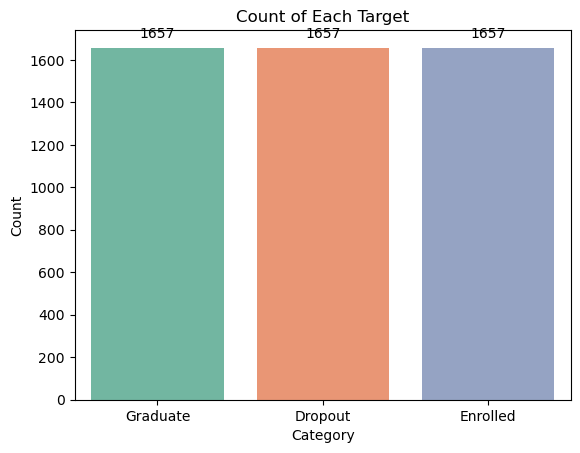

In [ ]:
#Post SMOTE

sns.countplot(data=ytrain_resampled_df,x='target',hue ='target',palette = 'Set2')
plt.title("Count of Each Target")
plt.xlabel("Category")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
        textcoords='offset points'  
    )
plt.show()

### Feature Engineering


From the data dictionary and the EDA plots, we identified several features that needed to be removed. For example, the "Educational special needs" column was removed because 99% of the values were '0' (no), making it highly imbalanced and not very useful. Other features with similar issues that we decided to drop include 'Application order,' 'Previous qualification,' 'Nationality,' 'Educational special needs,' and 'International.'

Some features had too many categories, which could complicate the analysis and create a high number of new features when applying one-hot encoding. To simplify, we grouped less common categories together. For example, in the "Marital status" column, most values were '1' (single) or '2' (married), so we grouped the remaining categories as "others." A similar approach was used for features like "Father's occupation" and "Mother's occupation."  We dedicated the cell below for feature engineering.  

In [ ]:
#Feature Engineering - remove and simplified features

def preprocess_student_data(df):
    df_processed = df.copy()
    
    # Simplify Marital Status - using string values
    marital_status_map = {
        'Single': 'Single',
        'Married': 'Married'
    }
    df_processed['Marital status'] = df_processed['Marital status'].apply(
        lambda x: marital_status_map.get(x, 'Others')
    )

    # Simplify Application Mode 
    keep_modes = [1, 17, 39, 43, 44, 51]
    df_processed['Application mode'] = df_processed['Application mode'].apply(
        lambda x: str(x) if x in keep_modes else 'Others' 
    )
    
    # Drop specified columns
    columns_to_drop = [
        'Application order',
        'Previous qualification',
        'Nationality',
        'Educational special needs',
        'International'
    ]
    df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')
    
    # Parents' qualifications
    def simplify_qualification(x):
        higher_ed_codes = [2, 3, 4, 5, 40, 41, 42, 43, 44]
        if pd.isna(x):
            return "Unknown"
        elif x in higher_ed_codes:
            return "With Degree"
        else:
            return "Without Degree"
    
    df_processed["Mother's qualification"] = df_processed["Mother's qualification"].apply(simplify_qualification)
    df_processed["Father's qualification"] = df_processed["Father's qualification"].apply(simplify_qualification)
    
    
    # Simplify Mother's and Father's occupations
    occupation_mapping = {
        9: "Unskilled",
        192: "Unskilled",
        193: "Unskilled",
        194: "Unskilled",
        191: "Unskilled",
        153: "Unskilled",
        3: "Skilled",
        7: "Skilled",
        8: "Skilled",
        173: "Skilled",
        175: "Skilled",
        132: "Skilled",
        131: "Skilled",
        134: "Skilled",
        4: "Office",
        141: "Office",
        143: "Office",
        144: "Office",
        1: "Professional",
        2: "Professional",
        122: "Professional",
        123: "Professional",
        125: "Professional",
        0: "Other",
        10: "Other",
        90: "Other",
        99: "Other"
    }

    # Apply remapping to Mother's occupation & Father's occupation
    df_processed["Mother's occupation"] = df_processed["Mother's occupation"].apply(
        lambda x: occupation_mapping.get(x, "Other or Undefined Jobs"))
    
    df_processed["Father's occupation"] = df_processed["Father's occupation"].apply(
        lambda x: occupation_mapping.get(x, "Other or Undefined Jobs"))



    # rearrange age to 3 groups
    def bin_age(age):
        if age < 20:
            return 'Below 20'
        elif 20 <= age <= 30:
            return '20-30'
        else:
            return 'Above 30'
    
    df_processed['Age at enrollment'] = df_processed['Age at enrollment'].apply(bin_age)



    # Convert other categorical columns to string type
    # for col in ['Course', 'Daytime/evening attendance', 'Displaced']:
    # df_processed[col] = df_processed[col].astype(str)

    return df_processed

xtrain_post_removed = preprocess_student_data(xtrain)
xtest_post_removed = preprocess_student_data(xtest)



In [43]:
#Perform One hot encoding on categorical data


categorical_features = ['Marital status', 'Application mode', 'Course', 
                       "Mother's qualification", "Father's qualification", 
                       "Mother's occupation", "Father's occupation", "Age at enrollment",'GDP','Unemployment rate','Inflation rate']

xtrain_post_removed_nocat = xtrain_post_removed.drop(columns=categorical_features)
xtest_post_removed_nocat = xtest_post_removed.drop(columns=categorical_features)

ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_matrix_train = ohe.fit_transform(xtrain_post_removed[categorical_features])
ohe_matrix_test = ohe.fit_transform(xtest_post_removed[categorical_features])

#create ohe dataframe
df_ohe_train = pd.DataFrame(ohe_matrix_train, columns=ohe.get_feature_names_out())
df_ohe_test = pd.DataFrame(ohe_matrix_test, columns=ohe.get_feature_names_out())

#merge back
x_train_post_encoded = pd.concat([xtrain_post_removed_nocat,df_ohe_train],axis=1)
x_test_post_encoded = pd.concat([xtest_post_removed_nocat,df_ohe_test],axis=1)


In [44]:
print("Reconstructed DataFrame:")
x_train_post_encoded.head(5)

Reconstructed DataFrame:


,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Application mode_17,Application mode_39,Application mode_43,Application mode_44,Application mode_51,Application mode_Others,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Mother's qualification_Without Degree,Father's qualification_Without Degree,Mother's occupation_Other,Mother's occupation_Other or Undefined Jobs,Mother's occupation_Professional,Mother's occupation_Skilled,Mother's occupation_Unskilled,Father's occupation_Other,Father's occupation_Other or Undefined Jobs,Father's occupation_Professional,Father's occupation_Skilled,Father's occupation_Unskilled,Age at enrollment_Above 30,Age at enrollment_Below 20,GDP_-3.12,GDP_-1.7,GDP_-0.92,GDP_0.32,GDP_0.79,GDP_1.74,GDP_1.79,GDP_2.02,GDP_3.51,Unemployment rate_8.9,Unemployment rate_9.4,Unemployment rate_10.8,Unemployment rate_11.1,Unemployment rate_12.4,Unemployment rate_12.7,Unemployment rate_13.9,Unemployment rate_15.5,Unemployment rate_16.2,Inflation rate_-0.3,Inflation rate_0.3,Inflation rate_0.5,Inflation rate_0.6,Inflation rate_1.4,Inflation rate_2.6,Inflation rate_2.8,Inflation rate_3.7
0,1,125.0,122.2,0,0,1,1,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,122.0,116.1,1,0,1,0,1,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,123.0,118.8,1,0,1,0,1,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,133.1,114.8,0,0,1,0,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,100.0,0,0,0,0,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
print("Shape of x_train_processed:", x_train_post_encoded.shape)
print("Shape of x_test_processed:", x_test_post_encoded.shape)

Shape of x_train_processed: (3318, 82)
Shape of x_test_processed: (1106, 82)


In [47]:
#Balance post Feature engineering using SMOTE

ytrain_df = pd.DataFrame(ytrain, columns=['Target'])

# Encode the target variable
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain_df['Target'])  

# Apply SMOTE for oversampling on the post feature engineering + onehot encoding data
smote = SMOTE(sampling_strategy='auto')
xtrain_resampled1, ytrain_resampled1 = smote.fit_resample(x_train_post_encoded, ytrain_encoded)

# Convert resampled data into DataFrames

if isinstance(x_train_post_encoded, pd.DataFrame):
    xtrain_resampled_df1 = pd.DataFrame(xtrain_resampled1, columns=x_train_post_encoded.columns)
else:
    xtrain_resampled_df1 = pd.DataFrame(xtrain_resampled1)

# Convert ytrain_resampled to a DataFrame
ytrain_resampled_df1 = pd.DataFrame(ytrain_resampled1, columns=['target'])

# Check class distribution before and after SMOTE
print("Before SMOTE:", ytrain_df['Target'].value_counts())
print("\nAfter SMOTE:", ytrain_resampled_df1['target'].value_counts())

# Verify data integrity (no NaN values)
print(f'ytrain_resampled Columns with NaN value: {ytrain_resampled_df1.isna().any(axis=0).sum()}')



Before SMOTE: Target
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

After SMOTE: target
2    1657
0    1657
1    1657
Name: count, dtype: int64
ytrain_resampled Columns with NaN value: 0


In [48]:
xtrain_resampled_df1.head()

,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Application mode_17,Application mode_39,Application mode_43,Application mode_44,Application mode_51,Application mode_Others,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Mother's qualification_Without Degree,Father's qualification_Without Degree,Mother's occupation_Other,Mother's occupation_Other or Undefined Jobs,Mother's occupation_Professional,Mother's occupation_Skilled,Mother's occupation_Unskilled,Father's occupation_Other,Father's occupation_Other or Undefined Jobs,Father's occupation_Professional,Father's occupation_Skilled,Father's occupation_Unskilled,Age at enrollment_Above 30,Age at enrollment_Below 20,GDP_-3.12,GDP_-1.7,GDP_-0.92,GDP_0.32,GDP_0.79,GDP_1.74,GDP_1.79,GDP_2.02,GDP_3.51,Unemployment rate_8.9,Unemployment rate_9.4,Unemployment rate_10.8,Unemployment rate_11.1,Unemployment rate_12.4,Unemployment rate_12.7,Unemployment rate_13.9,Unemployment rate_15.5,Unemployment rate_16.2,Inflation rate_-0.3,Inflation rate_0.3,Inflation rate_0.5,Inflation rate_0.6,Inflation rate_1.4,Inflation rate_2.6,Inflation rate_2.8,Inflation rate_3.7
0,1,125.0,122.2,0,0,1,1,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,122.0,116.1,1,0,1,0,1,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,123.0,118.8,1,0,1,0,1,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,133.1,114.8,0,0,1,0,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,100.0,0,0,0,0,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
ytrain_resampled_df1.head()


,target
0,2
1,2
2,2
3,0
4,0


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

#### Explain baseline model

Explain Baseline Model and Improved Model (using feature engineering/one hot encoding)

In [50]:
#put the code of baseline model here

In [51]:

#Improve model using grid search

best_model = None

warnings.filterwarnings("ignore", category=ConvergenceWarning)

grid = {
    'estimator__C': [0.0001,0.001,0.01, 0.1, 1, 10],  
    'estimator__penalty': ['l1','l2'],  
    'estimator__solver': ['saga',],
    'estimator__class_weight': ['balanced', None]

}


# build the model
model = OneVsRestClassifier(LogisticRegression(max_iter=2000, random_state = 109))



# we use grid Search and 10-fold cross-validation
gd_search = GridSearchCV( estimator=model, param_grid = grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1,verbose = 1,return_train_score=True)
gd_search.fit(xtrain_resampled_df1, ytrain_resampled1)

# get the best model and best parameters
best_model = gd_search.best_estimator_
print("Best Hyperparame:", gd_search.best_params_)

#Do cross validation
cv_scores = cross_validate(best_model, xtrain_resampled_df1, ytrain_resampled1, cv=5, scoring='roc_auc_ovr',return_estimator=True,return_train_score=True)

# Print cross-validation results
print(f"Cross-Validation training Accuracy Scores: {cv_scores['train_score']}")
print(f"Cross-Validation CV Accuracy Scores: {cv_scores['test_score']}")
#print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparame: {'estimator__C': 1, 'estimator__class_weight': None, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}
Cross-Validation training Accuracy Scores: [0.91263845 0.90980527 0.90290369 0.8998168  0.90013   ]
Cross-Validation CV Accuracy Scores: [0.86173639 0.86738953 0.90267281 0.91827066 0.91870574]


In [ ]:
#use best moddel & x_train_processed data to see classification report
y_train_pred = best_model.predict(xtrain_resampled_df)

print("Classification Report on Training Data:")
print(classification_report(ytrain_resampled, y_train_pred, target_names=label_encoder.classes_))

In [23]:
#use best moddel & x_train_processed data to see classification report
y_train_pred = best_model.predict(x_train_processed)

print("Classification Report on Training Data:")
print(classification_report(ytrain_encoded, y_train_pred, target_names=label_encoder.classes_))


Classification Report on Training Data:
              precision    recall  f1-score   support

     Dropout       0.78      0.67      0.72      1657
    Enrolled       0.69      0.66      0.68      1657
    Graduate       0.69      0.81      0.75      1657

    accuracy                           0.71      4971
   macro avg       0.72      0.71      0.71      4971
weighted avg       0.72      0.71      0.71      4971



#### Export the prediction

In [24]:
# Predict on test data
y_pred_test = gd_search.best_estimator_.predict(x_test_processed)

# Reverse the encoding to get original class labels
y_pred_test = label_encoder.inverse_transform(y_pred_test)

submission = pd.DataFrame({'ID': xtest.index,'LogReg_Predicted': y_pred_test})
submission.to_csv('./submissions/submission_logreg.csv', index=False)

Visualisation

In [25]:
names = preprocessor.get_feature_names_out()

#remove and clean up the string
names = [name.replace('num__', '').replace('cat__', '') for name in names]
coefficients = np.mean(np.abs([estimator.coef_ for estimator in best_model.estimators_]), axis=0).flatten()

# Create a df and sort
feature_importance_df = pd.DataFrame({'Feature': names, 'Importance': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Features:")
print(feature_importance_df.head(10))

Top 10 Features:
                              Feature  Importance
72                         Course_171    2.941275
306            Mother's occupation_90    1.892525
375            Father's occupation_90    1.782107
285             Mother's occupation_0    1.677580
353           Mother's occupation_191    1.596901
136                       Course_9238    1.497554
231         Mother's qualification_34    1.431384
30                Application mode_18    1.402666
3    Curricular units 2nd sem (grade)    1.370909
19                 Application mode_7    1.265296


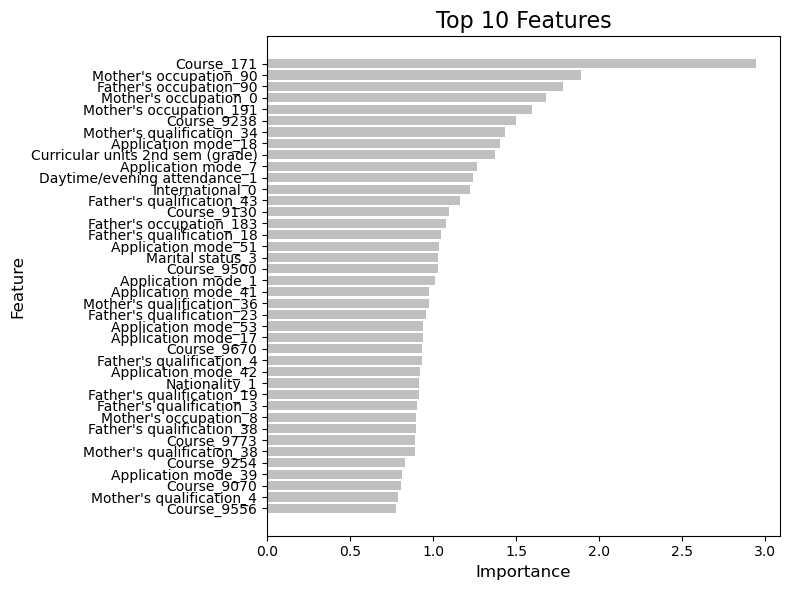

In [26]:
top10_features = feature_importance_df.head(40)
plt.figure(figsize=(8, 6))
plt.barh(top10_features['Feature'], top10_features['Importance'], color='silver')

plt.title("Top 10 Features", fontsize=16)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Feature", fontsize = 12)

plt.gca().invert_yaxis()
plt.tight_layout()


In [27]:
pd.set_option('display.max_rows', None)  
#print(*feature_importance_df.head(434))

# Sorting the DataFrame by the desired column in descending order
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top rows
sorted_df.head(434) # Replace n with the number of rows you want
#print(top_rows)



,Feature,Importance
72,Course_171,2.941275
306,Mother's occupation_90,1.892525
375,Father's occupation_90,1.782107
285,Mother's occupation_0,1.677580
353,Mother's occupation_191,1.596901
136,Course_9238,1.497554
231,Mother's qualification_34,1.431384
30,Application mode_18,1.402666
3,Curricular units 2nd sem (grade),1.370909
19,Application mode_7,1.265296


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

"Animation and Multimedia Design" emerge as the most significant features, highlighting the critical role of the chosen course in determining student outcomes.

Parental background, particularly "Mother's occupation" (e.g., Cleaning Workers) and "Father's occupation" (e.g., Other Situation), demonstrates a notable influence, suggesting that socioeconomic conditions are closely linked to academic success.

Grades in the second semester are identified as strong predictors of student outcomes, underlining the importance of consistent academic performance throughout the study period. 

The modes of application contribute to outcomes in a moderate way, indicating that the process and timing of student applications may have a secondary yet measurable impact.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [ ]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

#### Model Selection & Training

The idea of exploring the Decision Tree Classifier begins with creating a baseline model using the balanced xtrain/ytrain data without feature engineering or one-hot encoding. This approach works because decision trees are non-parametric models that can handle raw data directly. They can split data based on thresholds, making them robust to different data distributions, and they naturally handle categorical variables without requiring one-hot encoding. This characteristic allows decision trees to work effectively with less-prepared data compared to models like logistic regression.

For our baseline model, we explore the criterion parameter using both 'gini' and 'entropy' to compare their performance and determine which method yields the best results. We use this as a benchmark for evaluation. The model is tested with a range of tree depths, starting from a minimum depth of 2 up to a maximum depth of 30, using cross-validation to assess performance.

In [ ]:

#Start with the decision tree baseline with cv =5. 

criterion = ['gini', 'entropy']

first_depth = 2
final_depth = 30
step = 2

results = []
for cur_criterion in criterion:      
    for max_depth in range(first_depth, final_depth+1, step):
        dt = DecisionTreeClassifier(criterion=cur_criterion , max_depth=max_depth)
        scores = cross_val_score(estimator=dt, X=xtrain_resampled_df, y=ytrain_resampled_df, cv=5, n_jobs=-1)
        
        cur_results = {'criterion': cur_criterion,
                      'depth': max_depth,
                      'all_cv': scores,
                      'mean_cv': scores.mean()}
        results.append(cur_results)
dt = pd.DataFrame(results)

In [65]:
dt.head()

,criterion,depth,all_cv,mean_cv
0,gini,2,"[0.6371859296482412, 0.6237424547283702, 0.660...",0.646753
1,gini,4,"[0.6683417085427136, 0.6780684104627767, 0.702...",0.705097
2,gini,6,"[0.6603015075376885, 0.6961770623742455, 0.732...",0.729847
3,gini,8,"[0.6924623115577889, 0.7152917505030181, 0.735...",0.744126
4,gini,10,"[0.685427135678392, 0.7052313883299799, 0.7474...",0.748554


#### Visualize the accuracy for different hyperparameters

The plot shows the variation in cross-validation accuracy as the depth of a decision tree increases, comparing the performance of the 'gini' and 'entropy' criteria. Initially, accuracy improves for both criteria as depth increases, with 'Gini' peaking around a depth of 10 and 'Entropy' peaking around 16, after which the performance stabilizes or slightly declines, likely due to overfitting. Overall, both criteria perform similarly, but 'Entropy' shows a slight advantage in accuracy at greater depths

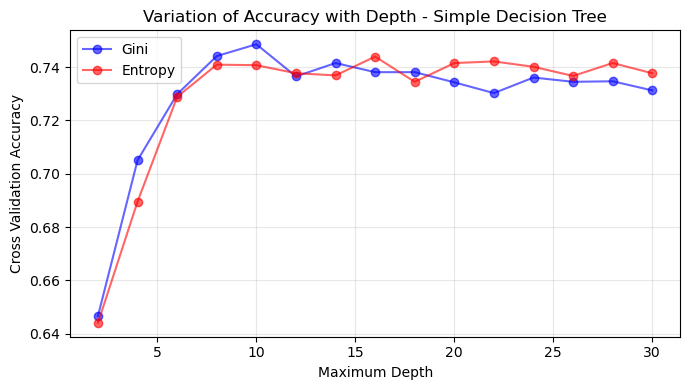

In [53]:
plt.figure(figsize=(7, 4))

plt.plot(dt[dt.criterion == 'gini'].depth,
         dt[dt.criterion == 'gini'].mean_cv, 'b-', marker='o', alpha = 0.6, label='Gini')
plt.plot(dt[dt.criterion == 'entropy'].depth,
         dt[dt.criterion == 'entropy'].mean_cv, 'r-', marker='o', alpha = 0.6, label='Entropy')
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.legend()
plt.grid(alpha = 0.3)

plt.tight_layout()
plt.show()

In [ ]:
#Use code from lab
df_gini = dt[dt['criterion'] == 'gini']
df_entropy = dt[dt['criterion'] == 'entropy']

x_gini = df_gini['depth'].values.astype(float)
y_gini = df_gini['mean_cv'].values.astype(float)

x_entropy = df_entropy['depth'].values.astype(float)
y_entropy = df_entropy['mean_cv'].values.astype(float)

stds_gini = np.array([ np.std(scores) for scores in df_gini['all_cv']], dtype = float) 
stds_entropy = np.array([ np.std(scores) for scores in df_entropy['all_cv']], dtype = float)

In [55]:
#Finding the best hyper parameter


mean_CV_acc_gini = df_gini['mean_cv']
mean_CV_acc_entropy = df_entropy['mean_cv']

best_idx_gini = np.argmax(mean_CV_acc_gini)
best_idx_entropy = np.argmax(mean_CV_acc_entropy)

best_depth_gini = df_gini['depth'].iloc[best_idx_gini]
best_depth_entropy = df_entropy['depth'].iloc[best_idx_entropy]

print('The best depth based on Gini impurity was found to be: ', best_depth_gini)
print('The best depth based on Entropy was found to be: ', best_depth_entropy)


The best depth based on Gini impurity was found to be:  10
The best depth based on Entropy was found to be:  16


In [58]:
#Using code from lab
#Evalaute the performance at the best depth
model_tree_gini = DecisionTreeClassifier(max_depth=best_depth_gini, criterion = 'gini')
model_tree_entropy = DecisionTreeClassifier(max_depth=best_depth_entropy, criterion ='entropy')

model_tree_gini.fit(xtrain_resampled_df, ytrain_resampled_df)
model_tree_entropy.fit(xtrain_resampled_df, ytrain_resampled_df)

#Check Accuracy in Train and Test Set (Gini Impurity)
acc_trees_train_gini = accuracy_score(ytrain_resampled_df, model_tree_gini.predict(xtrain_resampled_df))
#acc_trees_test_gini  = accuracy_score(y_test,  model_tree_gini.predict(xtest))   no test data provided

print("================ [Gini Impurity] ================")
print("Simple Decision Trees: Accuracy, Training Set \t : {:.2%}".format(acc_trees_train_gini))
#print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(acc_trees_test_gini))

#Check Accuracy in Train and Test Set (Entropy)
acc_trees_train_entropy = accuracy_score(ytrain_resampled_df, model_tree_entropy.predict(xtrain_resampled_df))
#acc_trees_test_entropy = accuracy_score(y_test,  model_tree_entropy.predict(X_test))

print("\n================ [Entropy] ================")
print("Simple Decision Trees: Accuracy, Training Set \t : {:.2%}".format(acc_trees_train_entropy))
#print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(acc_trees_test_entropy))

================ [Gini Impurity] ================
Simple Decision Trees: Accuracy, Training Set 	 : 89.34%

================ [Entropy] ================
Simple Decision Trees: Accuracy, Training Set 	 : 99.01%


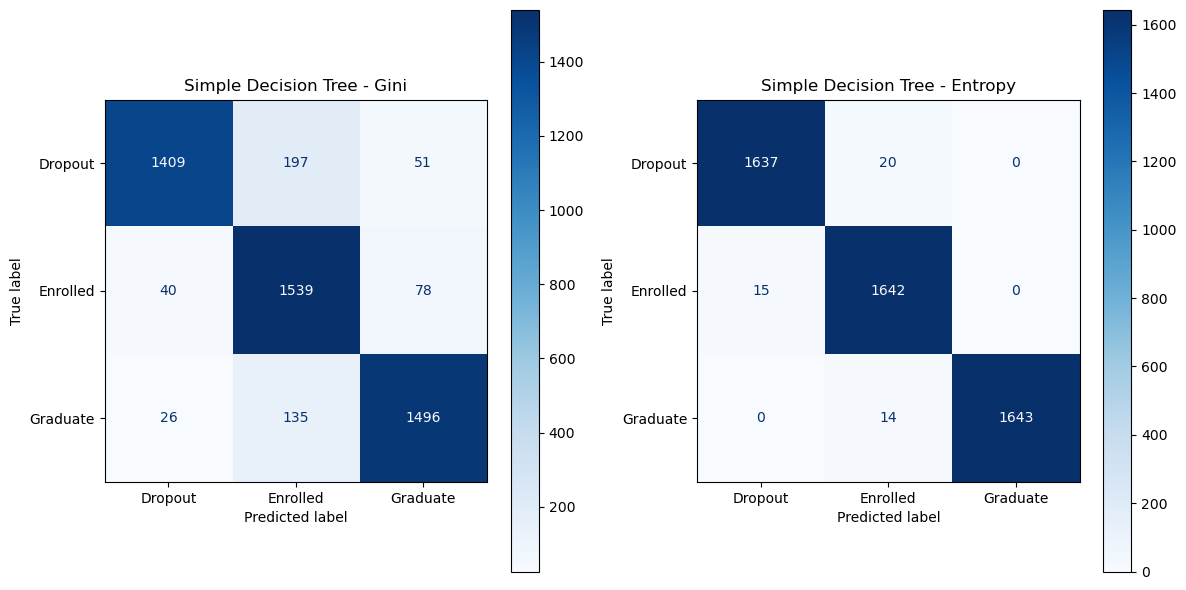

In [ ]:
#plot confustion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ConfusionMatrixDisplay.from_estimator(model_tree_gini, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[0]);
ConfusionMatrixDisplay.from_estimator(model_tree_entropy, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[1])
axes[0].set_title('Simple Decision Tree - Gini')
axes[1].set_title('Simple Decision Tree - Entropy')

plt.tight_layout()

plt.show()

#### Model Improvement

Based on the results, the entropy-based decision tree with a high depth is overfitting the data, which is evident from the perfect performance on the training data (100% accuracy) but a likely inability to generalize well to unseen data. The Gini-based decision tree shows less overfit.

In order to improve the model based on Entropy, we will use the pruning method on entropy and see the result to compare with the result from best max depth based on Gini parmater. The reason we choose pruning based on the max_depth result from entropy which is much higher than Gini. ccp_alpha tuning is used.  We performed multiple rounds of adjusting ccp_alpha. The best outcome is at ccp_alpha = 0.03  as shown below.   

Best ccp_alpha: 0.002631578947368421, Best Cross-Validation Score: 0.7485471623712122


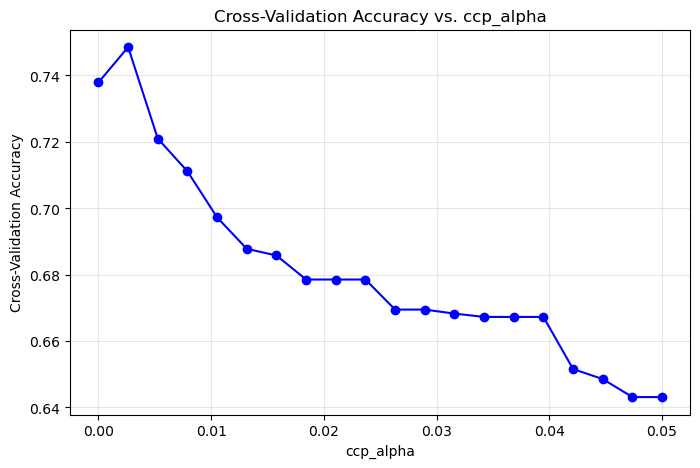

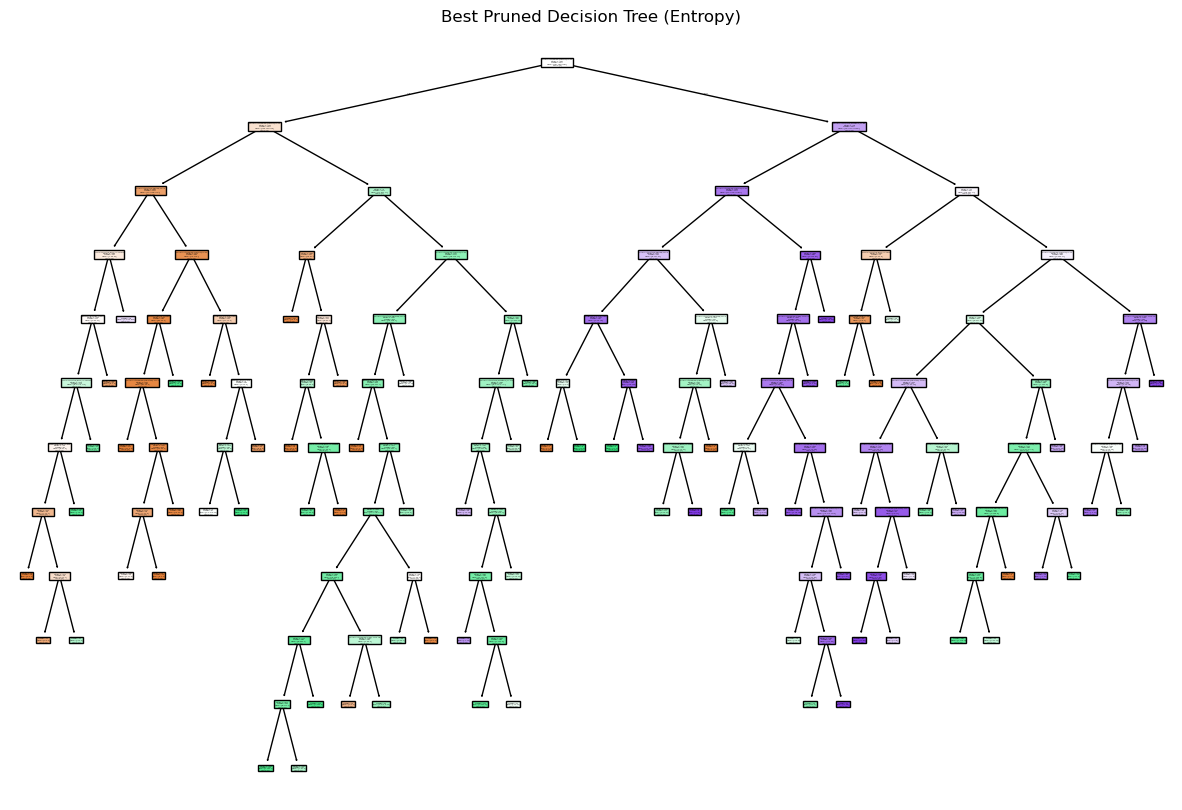

In [ ]:
#Generate the range of ccp_alpha and use cv to loop through and find the best ccp_alpha. Then create model and fit train data


ccp_alphas = np.linspace(0.0, 0.05, 20)  
best_score = -np.inf
best_ccp_alpha = None
scores = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(max_depth=best_depth_entropy, criterion='entropy', ccp_alpha=alpha)
    cv_score = cross_val_score(model, xtrain_resampled_df, ytrain_resampled_df.values.ravel(), cv=5, scoring='accuracy').mean()
    scores.append(cv_score)
    if cv_score > best_score:
        best_score = cv_score
        best_ccp_alpha = alpha

print(f"Best ccp_alpha: {best_ccp_alpha}, Best Cross-Validation Score: {best_score}")


plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, scores, marker='o', linestyle='-', color='b')
plt.xlabel('ccp_alpha')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs. ccp_alpha')
plt.grid(alpha=0.3)

entropy_pruned = DecisionTreeClassifier(max_depth=best_depth_entropy, criterion='entropy', ccp_alpha=best_ccp_alpha)
entropy_pruned.fit(xtrain_resampled_df, ytrain_resampled_df.values.ravel())
#entropy_pruned.fit(xtrain_resampled_df,ytrain_resampled_df)

plt.figure(figsize=(15, 10))
plot_tree(entropy_pruned, filled=True, feature_names=xtrain_resampled_df.columns, class_names=True)
plt.title('Best Pruned Decision Tree (Entropy)')



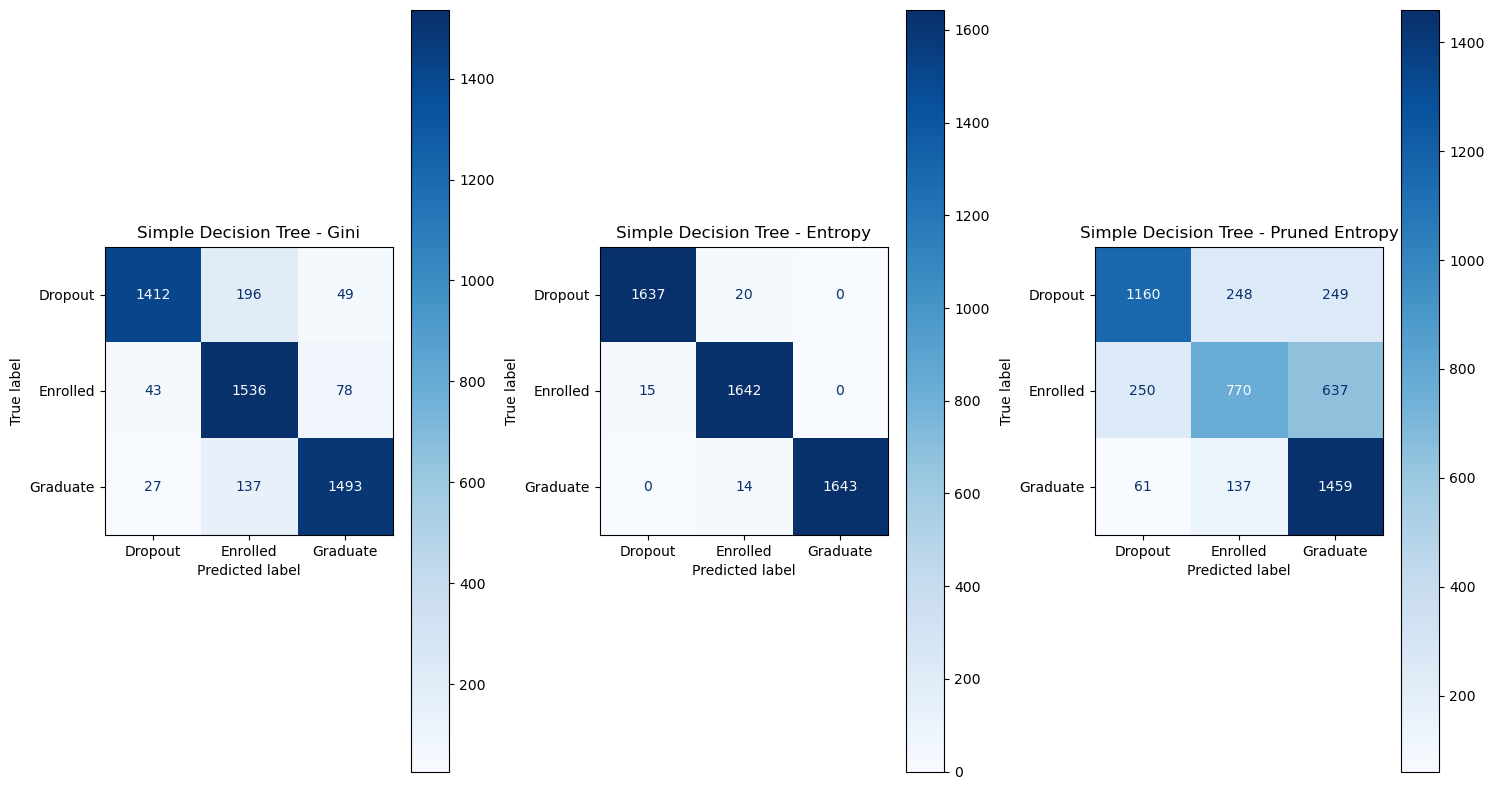

In [61]:
#compare confusion matrix


from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,8))
ConfusionMatrixDisplay.from_estimator(model_tree_gini, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[0]);
ConfusionMatrixDisplay.from_estimator(model_tree_entropy, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[1])
ConfusionMatrixDisplay.from_estimator(entropy_pruned, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[2])
axes[0].set_title('Simple Decision Tree - Gini')
axes[1].set_title('Simple Decision Tree - Entropy')
axes[2].set_title('Simple Decision Tree - Pruned Entropy')
# plt.rc('font', size=18)
plt.tight_layout()

plt.show()

**Summary** 
Model based on Gini shows the best accuracy compare among 3 of them

***Feature importance***

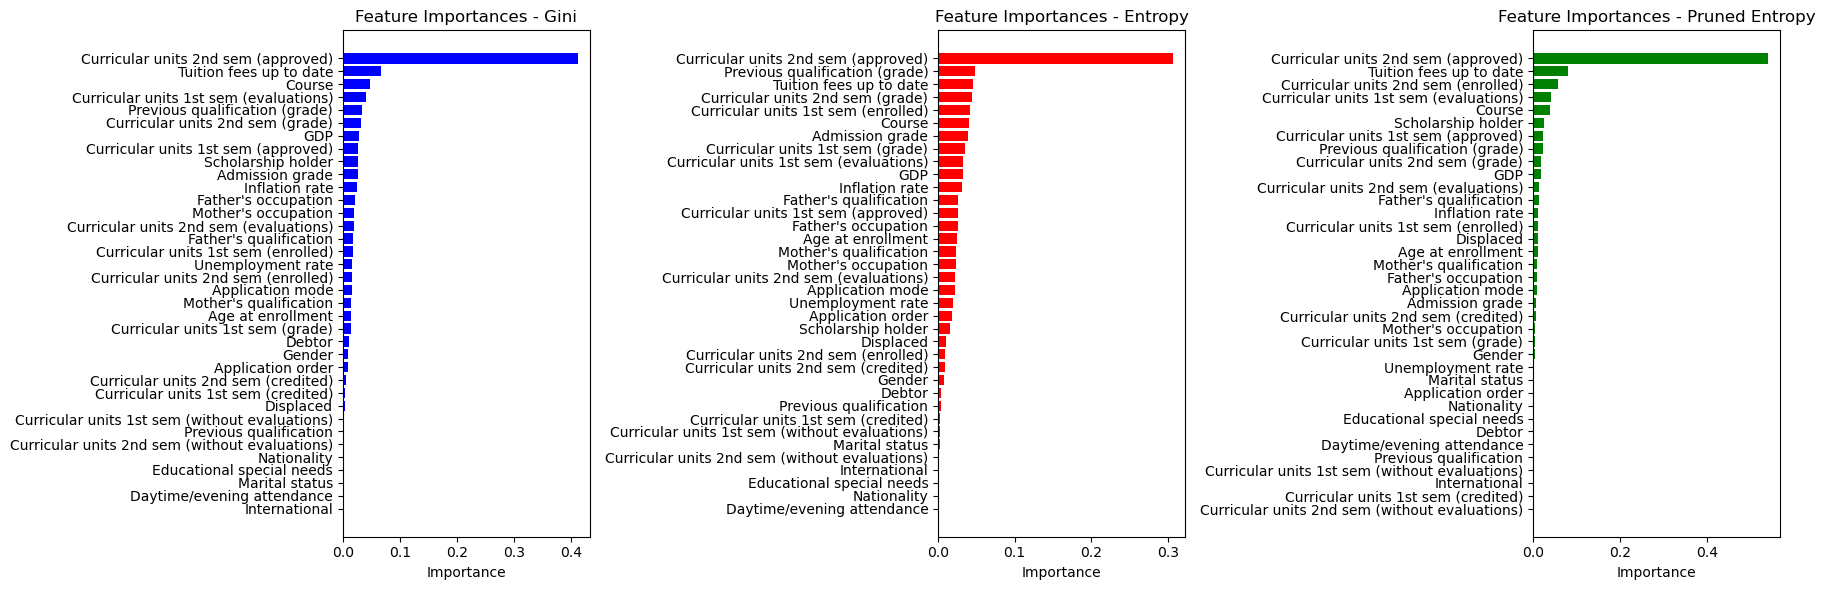

In [77]:
# Feature importances for Gini, Entropy, and Pruned Entropy
importances_gini = model_tree_gini.feature_importances_
importances_entropy = model_tree_entropy.feature_importances_
importances_pruned_entropy = entropy_pruned.feature_importances_

# Create DataFrames for feature importances and sort them
feature_imp_gini = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_gini
}).sort_values('importance', ascending=False)

feature_imp_entropy = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_entropy
}).sort_values('importance', ascending=False)

feature_imp_p_ent = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_pruned_entropy
}).sort_values('importance', ascending=False)


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


sorted_gini = feature_imp_gini.head(36)  # Adjust the number of features to display
axes[0].barh(sorted_gini['feature'], sorted_gini['importance'], color='b')
axes[0].set_title('Feature Importances - Gini')
axes[0].set_xlabel('Importance')
axes[0].invert_yaxis()


sorted_entropy = feature_imp_entropy.head(36)  # Adjust the number of features to display
axes[1].barh(sorted_entropy['feature'], sorted_entropy['importance'], color='r')
axes[1].set_title('Feature Importances - Entropy')
axes[1].set_xlabel('Importance')
axes[1].invert_yaxis()

sorted_p_ent = feature_imp_p_ent.head(36)  # Adjust the number of features to display
axes[2].barh(sorted_p_ent['feature'], sorted_p_ent['importance'], color='g')
axes[2].set_title('Feature Importances - Pruned Entropy')
axes[2].set_xlabel('Importance')
axes[2].invert_yaxis()


plt.tight_layout()



***Prediction Generation***

In [ ]:
#Generate the predictions from test data based on model based on Gini and write to csv file
DT_Predicted = model_tree_gini.predict(xtest)

predicted_df = pd.DataFrame({
    'ID': xtest.index,  
    'DT_Predicted': DT_Predicted
})

# Save to CSV
predicted_df.to_csv('./submissions/submission_dt_gini.csv', index=False)

In [ ]:
#Generate the predictions from test data based on model based on Entropy and write to csv file
DT_Predicted = model_tree_gini.predict(xtest)

predicted_df = pd.DataFrame({
    'ID': xtest.index,  
    'DT_Predicted': DT_Predicted
})

# Save to CSV
predicted_df.to_csv('./submissions/submission_dt_ent.csv', index=False)

In [ ]:
#Generate the predictions from test data based on model based on pruned Entropy and write to csv file
DT_Predicted = entropy_pruned.predict(xtest)

predicted_df = pd.DataFrame({
    'ID': xtest.index,  
    'DT_Predicted': DT_Predicted
})

# Save to CSV
predicted_df.to_csv('./submissions/submission_dt_p_ent.csv', index=False)

In [ ]:
predicted_df.head(5)

,ID,DT_Predicted
0,0,Graduate
1,1,Enrolled
2,2,Graduate
3,3,Graduate
4,4,Dropout


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [ ]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

We are choosing **Random forest** for our custom model as the Random forest model is an improvement from decision tree model. 
Compared to Decision Tree: Random Forest improves accuracy, reduces overfitting, and is more robust to noisy data and feature selection issues.
Compared to OVR Regression: Random Forest handles non-linear relationships, multiclass classification, and multicollinearity better while requiring less preprocessing (e.g., no scaling).

In [ ]:
xtrain_resampled_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [ ]:

# Prepare for Random Forest regression.
# Perform one-hot encoding on y_train_resampled because Random Forest does not support categorical data directly; it requires numeric input.


onehot_encoder = OneHotEncoder(sparse_output=False)

ytrain_OHencoded = onehot_encoder.fit_transform(ytrain_resampled_df)

print("One-Hot Encoded y_train resampled:")
print(ytrain_OHencoded)


# Retrieve the original labels for later use in the predicted data
original_labels = onehot_encoder.categories_[0]  
print("Original Labels:", original_labels)


One-Hot Encoded y_train resampled:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
Original Labels: ['Dropout' 'Enrolled' 'Graduate']


In [ ]:
#Apply Label encoder instead of onehotencoder

ytrain_resampled_df

lab_enc = LabelEncoder()

y_train_encoded = lab_enc.fit_transform(ytrain_resampled_df)

y_train_encoded



c:\Users\fahja\micromamba\envs\cs109a\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
# Display the Label encoding mapping
label_mapping = dict(zip(lab_enc.classes_, range(len(lab_enc.classes_))))
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label} -> {encoded_value}")

Label Mapping:
Dropout -> 0
Enrolled -> 1
Graduate -> 2


In [ ]:
#Create baseline randomforest model using max_depth =30 ,similar to decision tree baseline model.
#choose this number as a starting point for RF. Enable OOB for comparison
#use default gini criterion

rf = RandomForestClassifier(max_depth=30,
                           n_estimators=100,
                           max_features='sqrt',
                           oob_score=True,
                           random_state=109)

#perform 5-fold CV
cv_scores = cross_val_score(rf, xtrain_resampled_df, y_train_encoded, cv=5, scoring='accuracy')

rf.fit(xtrain_resampled_df, y_train_encoded)

print(f'The train score is: {rf.score(xtrain_resampled_df, y_train_encoded):.4f}')
##print(f'The test score is: {rf.score(xtrain_resampled_df, y_test):.4f}')
print(f'The OOB score is: {rf.oob_score_:.4f}')



The train score is: 1.0000
The OOB score is: 0.8443


In [ ]:
#Create baseline randomforest model using max_depth =30 ,similar to decision tree baseline model.
#choose this number as a starting point for RF. Enable OOB for comparison
#use entropy criterion

rf = RandomForestClassifier(criterion='entropy',
                            max_depth=30,
                           n_estimators=100,
                           max_features='sqrt',
                           oob_score=True,
                           random_state=109)

#perform 5-fold CV
cv_scores = cross_val_score(rf, xtrain_resampled_df, y_train_encoded, cv=5, scoring='accuracy')

rf.fit(xtrain_resampled_df, y_train_encoded)

print(f'The train score is: {rf.score(xtrain_resampled_df, y_train_encoded):.4f}')
##print(f'The test score is: {rf.score(xtrain_resampled_df, y_test):.4f}')
print(f'The OOB score is: {rf.oob_score_:.4f}')

The train score is: 1.0000
The OOB score is: 0.8487


The train score is overfitted as it is much more higher than OOB score. It could be from number of Maxdepth. 
We will use gridsearch for optimize the model

In [ ]:
#create optimized model with grid search. reduce n_estimators to 100 instead of 1000 to speed up the process.
#Reduce the Max depth to lower than 30. Based on the decision tree result. we limit max_depth at 8,10,12 and 15
#in case number of sample per split and leaf

rf2 = GridSearchCV(estimator=RandomForestClassifier(random_state=109),
                  param_grid={'max_depth': [6,8,10,12,14,16,18,20],
                   # 'min_samples_split': [ 5, 10, 20],
                   # 'min_samples_leaf': [ 2,5, 10],
                    'min_impurity_decrease': [0.001, 0.01, 0.1],
                    'max_features': ['sqrt', 'log2'],
                    'n_estimators': [100,150,200],
                    'criterion':['gini','entropy']},
                  cv=5,scoring = 'accuracy',n_jobs=-1)

rf2.fit(xtrain_resampled_df, y_train_encoded)





c:\Users\fahja\micromamba\envs\cs109a\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=109),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [ ]:
# Get the best parameters
print("Best Parameters:", rf2.best_params_)
print("Best Score:", rf2.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_impurity_decrease': 0.001, 'n_estimators': 200}
Best Score: 0.827411706419421


In [ ]:
#Use the best parameters from previous step to train final model. name it custom for grader evaluation

rf_tuned1 = RandomForestClassifier(
    max_depth=18,
    #max_features='sqrt',
    #min_samples_leaf=5,
    min_impurity_decrease = 0.01,
    #min_samples_split=5,
    n_estimators=150,
    criterion = 'entropy',
    random_state=109,
    oob_score=True
)

#perform 5-fold CV
cv_scores = cross_val_score(rf_tuned1, xtrain_resampled_df, y_train_encoded, cv=5, scoring='accuracy')

# Fit the final model to the training data
rf_tuned1.fit(xtrain_resampled_df, y_train_encoded)

#Check train score
print(f'The train score is: {rf_tuned1.score(xtrain_resampled_df, y_train_encoded):.4f}')

# Check the OOB score
print(f"OOB Score for Final Model: {rf_tuned1.oob_score_:.4f}")


The train score is: 0.7272
OOB Score for Final Model: 0.7210


**Extract Feature Importances from the rf_tuned1 model**

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': xtrain_resampled_df.columns,  # Feature names
    'Importance': rf_tuned1.feature_importances_  # Importance scores
}).sort_values(by='Importance', ascending=False)

# Print All features importance sort high to low
print(feature_importance.head(40))

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.318379
31                Curricular units 2nd sem (grade)    0.162190
24             Curricular units 1st sem (approved)    0.139542
16                         Tuition fees up to date    0.096675
25                Curricular units 1st sem (grade)    0.057506
18                              Scholarship holder    0.050806
29          Curricular units 2nd sem (evaluations)    0.038408
19                               Age at enrollment    0.030632
28             Curricular units 2nd sem (enrolled)    0.026632
23          Curricular units 1st sem (evaluations)    0.022238
22             Curricular units 1st sem (enrolled)    0.018146
3                                           Course    0.011047
1                                 Application mode    0.006902
15                                          Debtor    0.005662
10                             Mother's occupation    0

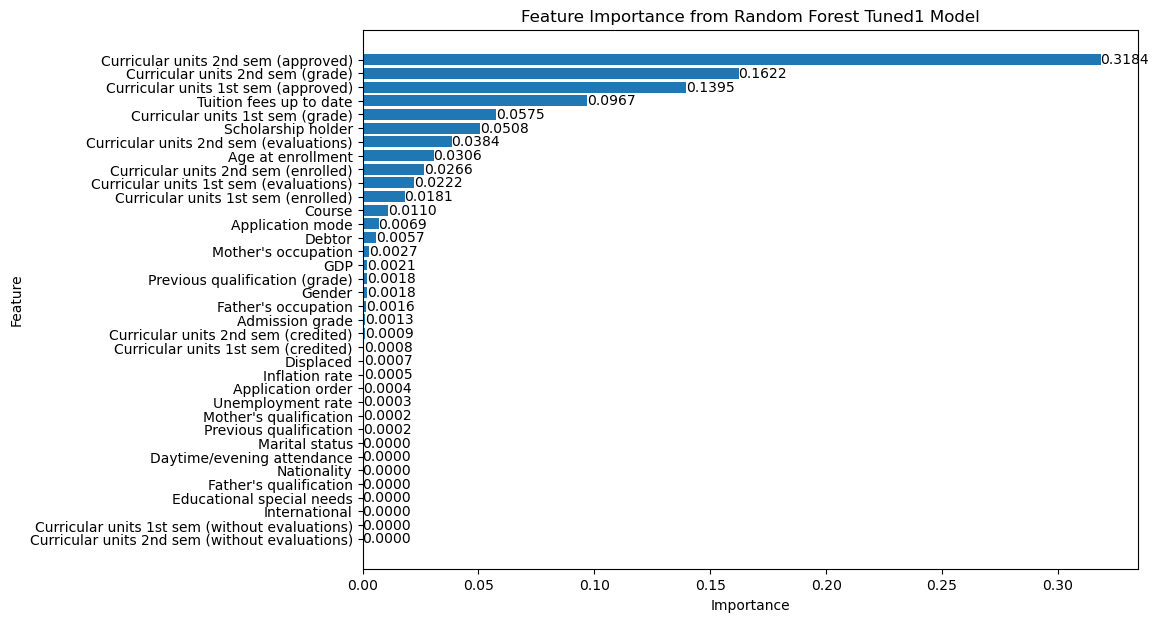

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 7))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Tuned1 Model')
plt.gca().invert_yaxis()  # To show the most important feature at the top


for bar in bars:
    width = bar.get_width()  
    plt.text(width, bar.get_y() + bar.get_height() / 2, 
             f'{width:.4f}', 
             ha='left', va='center', fontsize=10)  

plt.show()


**Based on the feature importance from the tuned model, we have categorized the features into three importance levels:**

**-Low Importance Features:** Features with importance values less than 0.01 (e.g., "Father's qualification" and below in the chart).

**-Medium Importance Features:** Features with importance values between 0.01 (inclusive) and 0.03 (exclusive).

**-High Importance Features:** Features with importance values greater than or equal to 0.03.

To improve model performance, we will refit the model using only the medium and high importance features.



In [ ]:
#create new xtrain with only medium and high importance features
#Define Feature to keep 


removed_features = [
    'Inflation rate',
    'Previous qualification',
    'Previous qualification (grade)',
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (credited)',
    'Unemployment rate',
    "Father's occupation",
    "Mother's qualification",
    'Marital status',
    'Application order',
    'Daytime/evening attendance',
    'Nationality',
    "Father's qualification",
    'Educational special needs',
    'International',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (without evaluations)'
]

#create new xtrain with the medium and high importance feature
xtrain_selected_feature = xtrain_resampled_df.drop(columns=removed_features, axis=1)
xtest_selected_feature = xtest.drop(columns=removed_features, axis=1)


In [ ]:
xtest_selected_feature.head()

,Application mode,Course,Mother's occupation,Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP
0,1,9070,9,165.8,1,0,1,0,0,18,6,7,6,14.166667,6,7,6,14.857143,-3.12
1,17,9147,4,115.5,1,1,1,1,0,18,5,8,3,10.333333,5,11,3,10.857143,1.74
2,17,9500,9,127.3,1,0,1,0,0,18,7,8,7,12.217143,8,11,7,12.118750,2.02
3,1,9238,191,119.3,1,1,1,0,0,20,6,7,6,12.666667,6,7,6,11.833333,3.51
4,16,171,9,134.6,1,0,1,1,0,19,0,0,0,0.000000,0,0,0,0.000000,0.32


**Refit the model using the best parameters from grid search and with limit features**


In [ ]:
#Create Rf_tune2 model which consists of the best model parameters from grid search and only include high and medium importance features

rf_tuned2 = RandomForestClassifier(
    max_depth=18,
    #max_features='sqrt',
    #min_samples_leaf=5,
    min_impurity_decrease = 0.01,
    #min_samples_split=5,
    n_estimators=150,
    criterion = 'entropy',
    random_state=109,
    oob_score=True
)


#scores = cross_val_score(estimator=dt, X=xtrain_resampled_df, y=ytrain_resampled_df, cv=5, n_jobs=-1)

#perform 5-fold CV
scores = cross_val_score(estimator=rf_tuned2, X=xtrain_selected_feature, y=y_train_encoded, cv=5, scoring='accuracy')

# Fit the final model to the training data
rf_tuned2.fit(xtrain_selected_feature, y_train_encoded)

#Check train score
print(f'The train score is: {rf_tuned2.score(xtrain_selected_feature, y_train_encoded):.4f}')

# Check the OOB score
print(f"OOB Score for Final Model: {rf_tuned2.oob_score_:.4f}")

The train score is: 0.7262
OOB Score for Final Model: 0.7192


In [ ]:
custom = rf_best

NameError: name 'rf_best' is not defined

In [ ]:
##################### DONT USE #############################
###Generate the predictions from test data based on the "baseline RF model" (before Grid Search) and write to csv file
Custom_Predicted = rf.predict(xtest)

# Reverse one-hot encoding based on original labels generated in the beginning
decoded_predictions = [original_labels[np.argmax(row)] for row in Custom_Predicted]

predicted_df = pd.DataFrame({
    'ID': xtest.index.tolist(),  
    'Custom_Predicted': decoded_predictions
})

# Save to CSV
predicted_df.to_csv('./submissions/submission_custom_rf.csv', index=False)

print("Decoded baseline predictions saved to './submissions/submission_custom.csv'")

In [ ]:
#Generate the predictions from test data (Revert output from LAbel encoder)

Custom_Predicted = rf_tuned1.predict(xtest)

# Reverse label encoding to get original labels
decoded_predictions = lab_enc.inverse_transform(Custom_Predicted)

# Create a DataFrame for predictions
predicted_df = pd.DataFrame({
    'ID': xtest.index.tolist(),
    'Custom_Predicted': decoded_predictions
})

# Save predictions to a CSV file
predicted_df.to_csv('./submissions/submission_custom_rftuned1.csv', index=False)

print("Decoded post GridsearchCV predictions saved to './submissions/submission_custom_rftuned1.csv'")




Decoded post GridsearchCV predictions saved to './submissions/submission_custom_rftuned1.csv'


In [ ]:
#Generate the predictions from test data (Revert output from LAbel encoder)  rf_tuned2

Custom_Predicted = rf_tuned2.predict(xtest_selected_feature)

# Reverse label encoding to get original labels
decoded_predictions = lab_enc.inverse_transform(Custom_Predicted)

# Create a DataFrame for predictions
predicted_df = pd.DataFrame({
    'ID': xtest.index.tolist(),
    'Custom_Predicted': decoded_predictions
})

# Save predictions to a CSV file
predicted_df.to_csv('./submissions/submission_custom_rftuned2.csv', index=False)

print("Decoded post GridsearchCV predictions saved to './submissions/submission_custom_rftuned2.csv'")



Decoded post GridsearchCV predictions saved to './submissions/submission_custom_rftuned2.csv'


In [ ]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [ ]:
grader.check("custom")

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [ ]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [ ]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [ ]:
hours_spent_on_hw = ...

In [ ]:
grader.check("wrapup")

In [ ]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

🌈 **This concludes HW5. Thank you!**
